In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the Dataset

In [2]:
df = pd.read_csv("D:\\Prodigy Info-tech\\Task-4\\twitter.csv")
df

,ID,Game,Sentiment,Message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
df.shape

(74681, 4)

In [4]:
df.columns

Index(['ID', 'Game', 'Sentiment', 'Message'], dtype='object')

In [5]:
df.describe()

,ID
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Game       74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Message    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
# check the null values
df.isnull().sum()

ID             0
Game           0
Sentiment      0
Message      686
dtype: int64

In [8]:
#drop the null values
df = df.dropna(axis=0)

In [9]:
df.isnull().sum()

ID           0
Game         0
Sentiment    0
Message      0
dtype: int64

In [10]:
# check the duplicated values
df.duplicated().sum()

2341

In [11]:
# delete duplicated values
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71654 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         71654 non-null  int64 
 1   Game       71654 non-null  object
 2   Sentiment  71654 non-null  object
 3   Message    71654 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [13]:
# column name change
df.columns= ['ID','Entity','Sentiment','Content']


In [14]:
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [15]:
df['Entity'].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2314
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                            

In [16]:
df['Sentiment'].value_counts()

Negative      21698
Positive      19712
Neutral       17707
Irrelevant    12537
Name: Sentiment, dtype: int64

In [17]:
# Replacing the Irrelevant sentiments into Neutral
df['Sentiment']=df['Sentiment'].replace('Irrelevant','Neutral')
df['Sentiment'].value_counts()

Neutral     30244
Negative    21698
Positive    19712
Name: Sentiment, dtype: int64

In [18]:
df['Content'][20]

'that was the first borderlands session in a long time where i actually enjoyed a really satisfying combat experience. i got some rather good kills'

### Data Visulaization

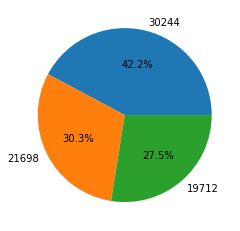

In [19]:
#sentiment visualization using Pie chart
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts, autopct='%1.1f%%')
plt.show()

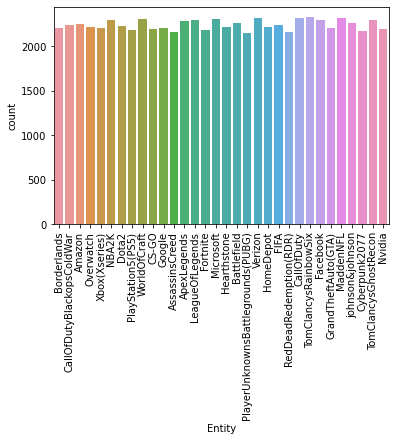

In [20]:
#Count distribution of Entities
sns.countplot(x="Entity",data=df)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
# installing wordcloud library
! pip install wordcloud

In [22]:
train_data =df.copy()

In [23]:
train_data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [24]:
#Load the data
df1=pd.read_csv("D:\\Prodigy Info-tech\\Task-4\\twitter_validation.csv")
df1

,ID,Game,Sentiment,Message
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [40]:
#column name change
df1.columns=['ID','Entity','Sentiment','text']

In [41]:
df1.head()

,ID,Entity,Sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [42]:
df1.shape

(1000, 4)

In [43]:
# check the null value
df1.isnull().sum()

ID           0
Entity       0
Sentiment    0
text         0
dtype: int64

In [44]:
# chcek the duplicated values
df1.duplicated().sum()

0

In [45]:
val_data =df1.copy()

In [46]:
val_data.head()

,ID,Entity,Sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [47]:
#replacing the Irrelevant sentiments into Neutral
val_data['Sentiment']=val_data['Sentiment'].replace('Irrelevant','Neutral')
val_data['Sentiment'].value_counts()

Neutral     457
Positive    277
Negative    266
Name: Sentiment, dtype: int64

In [48]:
val_data['Entity'].value_counts()

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
TomClancysRainbowSix                 35
Nvidia                               35
GrandTheftAuto(GTA)                  35
Amazon                               34
Fortnite                             34
Facebook                             33
PlayStation5(PS5)                    33
AssassinsCreed                       33
Borderlands                          33
Overwatch                            32
Hearthstone                          32
Verizon                              32
CS-GO                                32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


In [49]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shanal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shanal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
                

In [61]:
# text preprocessing
def preprocess_text(text):
    text = text.lower()
# remove special characters and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
# tokenization and removing stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [62]:
# apply the preprocess text function to the 'text' column
train_data['preprocessed_text'] = train_data['Content'].apply(preprocess_text)
train_data

,ID,Entity,Sentiment,Content,preprocessed_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting borderlands murder
...,...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...


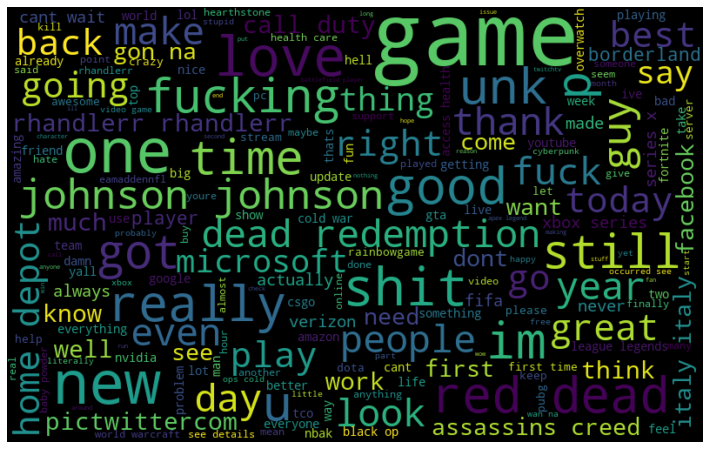

In [65]:
all_words = " ".join([sentence for sentence in train_data['preprocessed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [66]:
# apply the preprocess_text function to the 'text' column
val_data['preproceesed_text'] = val_data['text'].apply(preprocessed_text)
val_data

,ID,Entity,Sentiment,text,preproceesed_text
0,3364,Facebook,Neutral,I mentioned on Facebook that I was struggling ...,mentioned facebook struggling motivation go ru...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Neutral,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
996,4359,CS-GO,Neutral,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


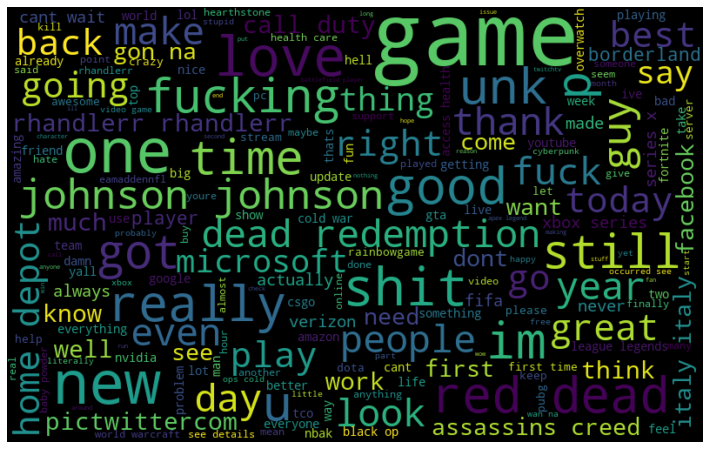

In [67]:
all_words = " ".join([sentence for sentence in train_data['preprocessed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Model Building & Evaluation

In [75]:
# intialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_data['preprocessed_text'])
# transform validation data
tfidf_validation_features = tfidf_vectorizer.transform(val_data['preproceesed_text'])
# display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")

TF-IDF Training Features Shape: (71654, 5000)
TF-IDF Validation Features Shape: (1000, 5000)


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_data['Sentiment'])
validation_labels_encoded = label_encoder.transform(val_data['Sentiment'])

In [86]:
! pip3 install xgboost

In [87]:
import xgboost  as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [89]:
# initialize the XGBoost classifier
xgb_classifier =xgb.XGBClassifier()

In [90]:
# Train the classifier on the TD-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [92]:
# predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

#Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)

In [94]:
#Evaluvate the performance of the XGBoost classifier
accuracy_xgb = accuracy_score(val_data['Sentiment'], validation_predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb: .2f}")

XGBoost Accuracy:  0.75


In [95]:
# display the additinaol classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(val_data['Sentiment'], validation_predictions_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74       266
     Neutral       0.70      0.87      0.78       457
    Positive       0.84      0.60      0.70       277

    accuracy                           0.75      1000
   macro avg       0.77      0.72      0.74      1000
weighted avg       0.76      0.75      0.74      1000



In [97]:
# confusion matrix
print("XGBoost Confusion Matrix:")
print(confusion_matrix(val_data['Sentiment'], validation_predictions_xgb))

XGBoost Confusion Matrix:
[[186  72   8]
 [ 36 397  24]
 [ 17  95 165]]


In [99]:
# example user input
user_input = "Platinum is the best loot @Borderlands"

#preprocess the user input
user_input_processed = preprocess_text(user_input)

# vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]
print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Positive


In [100]:
# example user input
user_input = "This is shitty. I get the profit-wise it was less business expected prior to a huge problem."

#preprocess the user input
user_input_processed = preprocess_text(user_input)

# vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]
print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Negative


In [101]:
# example user input
user_input = "Hello all, my name is Rolex"

#preprocess the user input
user_input_processed = preprocess_text(user_input)

# vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]
print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Neutral
